<a href="https://colab.research.google.com/github/sayali-patekar/Online-news-popularity/blob/master/OnlineNewsPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1Kj-J1fr_QS8D4Doxs5zhSWRQrhrlMutV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('OnlineNewsPopularity.csv')


In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate as cross_val_score



In [0]:
data = pd.read_csv('OnlineNewsPopularity.csv')


DATA UNDERSTANDING
The dataset is taken from UCI Machine learning repository (link: https://archive.ics.uci.edu/ml/datasets/online+news+popularity). The dataset was published by Mashable (www.mashable.com) and the acquisition date was on January 8,2015.

Attribute Information:

 0. url:                           URL of the article
 1. timedelta:                     Days between the article publication and
                                   the dataset acquisition
 2. n_tokens_title:                Number of words in the title
 3. n_tokens_content:              Number of words in the content
 4. n_unique_tokens:               Rate of unique words in the content
 5. n_non_stop_words:              Rate of non-stop words in the content
 6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                   content
 7. num_hrefs:                     Number of links
 8. num_self_hrefs:                Number of links to other articles
                                   published by Mashable
 9. num_imgs:                      Number of images
10. num_videos:                    Number of videos
11. average_token_length:          Average length of the words in the
                                   content
12. num_keywords:                  Number of keywords in the metadata
13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus:           Is data channel 'Business'?
16. data_channel_is_socmed:        Is data channel 'Social Media'?
17. data_channel_is_tech:          Is data channel 'Tech'?
18. data_channel_is_world:         Is data channel 'World'?
19. kw_min_min:                    Worst keyword (min. shares)
20. kw_max_min:                    Worst keyword (max. shares)
21. kw_avg_min:                    Worst keyword (avg. shares)
22. kw_min_max:                    Best keyword (min. shares)
23. kw_max_max:                    Best keyword (max. shares)
24. kw_avg_max:                    Best keyword (avg. shares)
25. kw_min_avg:                    Avg. keyword (min. shares)
26. kw_max_avg:                    Avg. keyword (max. shares)
27. kw_avg_avg:                    Avg. keyword (avg. shares)
28. self_reference_min_shares:     Min. shares of referenced articles in
                                   Mashable
29. self_reference_max_shares:     Max. shares of referenced articles in
                                   Mashable
30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                   Mashable
31. weekday_is_monday:             Was the article published on a Monday?
32. weekday_is_tuesday:            Was the article published on a Tuesday?
33. weekday_is_wednesday:          Was the article published on a Wednesday?
34. weekday_is_thursday:           Was the article published on a Thursday?
35. weekday_is_friday:             Was the article published on a Friday?
36. weekday_is_saturday:           Was the article published on a Saturday?
37. weekday_is_sunday:             Was the article published on a Sunday?
38. is_weekend:                    Was the article published on the weekend?
39. LDA_00:                        Closeness to LDA topic 0
40. LDA_01:                        Closeness to LDA topic 1
41. LDA_02:                        Closeness to LDA topic 2
42. LDA_03:                        Closeness to LDA topic 3
43. LDA_04:                        Closeness to LDA topic 4
44. global_subjectivity:           Text subjectivity
45. global_sentiment_polarity:     Text sentiment polarity
46. global_rate_positive_words:    Rate of positive words in the content
47. global_rate_negative_words:    Rate of negative words in the content
48. rate_positive_words:           Rate of positive words among non-neutral
                                   tokens
49. rate_negative_words:           Rate of negative words among non-neutral
                                   tokens
50. avg_positive_polarity:         Avg. polarity of positive words
51. min_positive_polarity:         Min. polarity of positive words
52. max_positive_polarity:         Max. polarity of positive words
53. avg_negative_polarity:         Avg. polarity of negative  words
54. min_negative_polarity:         Min. polarity of negative  words
55. max_negative_polarity:         Max. polarity of negative  words
56. title_subjectivity:            Title subjectivity
57. title_sentiment_polarity:      Title polarity
58. abs_title_subjectivity:        Absolute subjectivity level
59. abs_title_sentiment_polarity:  Absolute polarity level
60. shares:                        Number of shares (target)

The dataset contains 61 attributes out of which 58 attributes are predictive, 2 non-predictive attributes and 1 target attribute.The target attribute being the number of shares of that particular article there are various attributes taken into consideration like-number of images, number of videos,unique tokens and so on that are contributing towards the increase in the number of shares.

In the below step the dataset is loaded into the book using pandas dataframe. And all the attributes in the dataset are listed.



In [0]:
#Checking all the columns 
data.columns


Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [0]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [0]:
data.shape


(39644, 61)

DATA PREPARATION:¶
Data preparation is one of the important steps in data mining.The data used for this project is firstly checked foe any null values and the data is checked for any noisy variables.The target variable is defined as a continous variable int the dataset, the target is transformed into categorical to fit the classification models used for analysis.The attributes are selected on the basis of domain knowledge and the recursive feature elimination(RFE) model provided by thr sklearnn library.

The problem of data leakage is handled by using the practices that are used to minimize data leakage when developing predictive models.The data is split into two training and validation data and the data is preapared using cross validation folds



In [0]:
data.describe()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [0]:
data.isnull().any()


url                              False
 timedelta                       False
 n_tokens_title                  False
 n_tokens_content                False
 n_unique_tokens                 False
                                 ...  
 title_subjectivity              False
 title_sentiment_polarity        False
 abs_title_subjectivity          False
 abs_title_sentiment_polarity    False
 shares                          False
Length: 61, dtype: bool

In [0]:
data.dtypes


url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [0]:
x=data.drop([' shares','url', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'   
  ], axis=1)


In [0]:
x.shape

(39644, 52)

In [0]:
x.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [0]:
Declare the Y that is Target.¶
Using attribute Shares as the target.
Analysing the Shares attributeabs


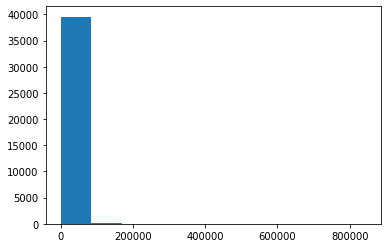

In [0]:
plt.hist(data[' shares'])
plt.show()


Since the data is highly skewed we are using Log Transformation to make data less skewed.This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.



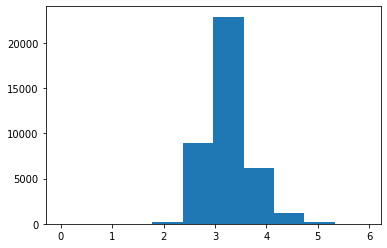

In [0]:
plt.hist(np.log10(data[' shares']))
plt.show()


Understanding the Shares data is to interpret into two sections¶


In [0]:
np.log10(data[' shares']).describe()


count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name:  shares, dtype: float64



Creating a new attribute as Category to be used as Target attribute
The Columns are identified as either 1 or 2 on following basis
Category 1 - the news artical that are shared less then 50% that is less than value 3 - Article is not much popular
Category 2 - the news artical that are shared more then 50% that is more than value 3 - Article is very popular


In [0]:
data_class = np.log10(data[' shares'])
data['category'] = (data_class<=3)*1 | (data_class>3)*2


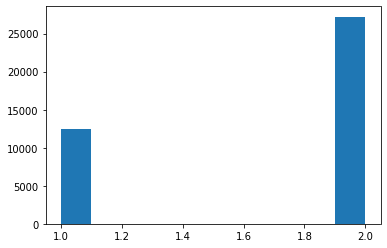

In [0]:
plt.hist(data['category'])
plt.show()


In [0]:
data.head(2)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,1


In [0]:
data.shape


(39644, 62)

Category is added to the Data as 62 attribute and will be used as target


In [0]:
y = data['category']


In [0]:
x.shape



(39644, 52)

In [0]:
y.shape

(39644,)

Spillting the data into training and test data taking 20% from the overall data as test data and 80% as training data


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=324)


verifying the data¶


In [0]:
X_train.shape


(31715, 52)

In [0]:
y_train.shape


(31715,)

In [0]:
X_test.shape


(7929, 52)

In [0]:
y_test.shape


(7929,)

Implementing Decision Tree


In [0]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [0]:
# Verifying the accuracy
Testing_Accuarcy = accuracy_score(y_true = y_test, y_pred = Predictions)
Training_Accuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)

print("========Training Acuracy ========== ")
print(Training_Accuracy)
print("========Testing Acuracy =========== ")
print(Testing_Accuarcy)


========Training Acuracy ========== 
0.7112722686425982
========Testing Acuracy =========== 
0.7024845503846638


In [0]:
confusion_matrix(y_test, Predictions)


array([[ 741, 1807],
       [ 552, 4829]])

In [0]:
confusion_matrix(y_test,Predictions)
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[ 741 1807]
 [ 552 4829]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test,Predictions))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, Predictions))
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
#Something we want to maximize
sensitivity = TP / float(FN + TP)
print(sensitivity)
#Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity = TN / float(TN + FP)
print(specificity)
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)


0.29751544961533616
0.5730858468677494
0.8974168370191414
0.29081632653061223
0.7091836734693877


Using Recursive feature elimination for identifying the most relevant attributes¶
Recursive Feature Elimination or RFE uses a model ( eg. linear Regression or SVM) to select either the best or worst-performing feature, and then excludes that feature. The whole process is then iterated until all features in the dataset are used up ( or up to a user-defined limit). Sklearn conveniently possesses a RFE function via the sklearn.feature_selection call and we use this along with a simple linear regression model and loistic regression model for ranking the features and to decide on the attribute for the model building.



In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False]
[40 38 42 26 17  7 34 32 36 35 33 31 28 11 13  9 21 14 39 46 45 49 51 48
 44 43 41 52 50 47 10  4  2  1  3  5  6 24 15  8 18 16 22 12 29 20 37 19
 27 25 23 30]


In [0]:
list(x)


[' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' avg_positive_polarity',
 ' min_positive_polarity',
 ' max_positive_polarity',
 ' avg_negative_polarity

In [0]:
x_New = data[[' LDA_02',' LDA_01',' LDA_03',' LDA_00',' LDA_04',' data_channel_is_socmed',' is_weekend',' data_channel_is_entertainment',' num_keywords',' global_subjectivity',' num_self_hrefs',' num_hrefs',' num_imgs',' num_videos',' n_tokens_title',' n_non_stop_unique_tokens',' n_non_stop_words',' global_rate_negative_words',' data_channel_is_tech',' rate_negative_words',' rate_positive_words']]


In [0]:
x_New.shape


(39644, 21)

In [0]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_New, y, test_size=0.20, random_state=324)


In [0]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [0]:
#calculating the accuracy score
Accuracy_DT = accuracy_score(y_true = y_test, y_pred = Predictions)
Accuracy_DT

0.6749905410518351

In [0]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions)
print(confusion)
TP_DT = confusion[1, 1]
TN_DT = confusion[0, 0]
FP_DT = confusion[0, 1]
FN_DT = confusion[1, 0]
#fpr, tpr, thresholds = metrics.roc_curve(y_test,Predictions)


[[ 596 1952]
 [ 625 4756]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test, Predictions))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, Predictions))
precision_DT = metrics.precision_score(y_test, Predictions)
recall_DT = metrics.recall_score(y_test, Predictions)
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
#Something we want to maximize

#Specificity: When the actual value is negative, how often is the prediction correct?
sensitivity_DT = TP_DT / float(FN_DT + TP_DT)
print(sensitivity)
#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity_DT = TN_DT / (TN_DT + FP_DT)
print(specificity)


0.3250094589481649
0.4881244881244881
0.8974168370191414
0.29081632653061223


In [0]:
#from sklearn.preprocessing import label_binarize 
#y = binarize(predicted_knn, 0.3)
#n_classes = y.reshape(-1, 1)
y_pred_prob = rank_classifier.predict_proba(X_test)[:, 1]


#y_pred_class = binarize(y_pred_prob, 0.3)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)


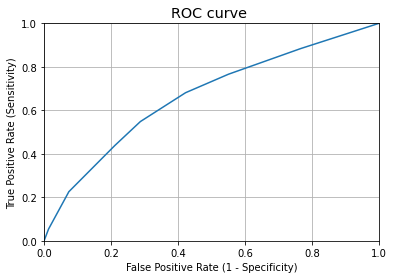

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


In [0]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])


In [0]:
evaluate_threshold(0.65)


Sensitivity: 0.681100167255157
Specificity: 0.5773155416012559


In [0]:
#loss function
from sklearn.metrics import log_loss
Loss_DT = log_loss(y_test,y_pred_prob)
Loss_DT


0.5894467289540443

CONCLUSION


The decision tree  model that we have built gives 67% accuracy on the testing data. Thus, we have built a model that can predict if the News will become popular based on the given features of the news.

